# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 35 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [4]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial.distance import cdist

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, eps=0.7, min_pts=7):
        
        self.eps = eps
        self.min_pts = min_pts
        
        return 
        
    def fit(self, X, y=None):
        """
        Use data matrix x to compute model parameters
        """
        
        NV = np.ones(X.shape[0])
        self.labels = np.zeros(X.shape[0])
        all_dist = cdist(X, X)
        self.cluster_count = 0
        
        while(NV.sum() != 0):
            x_i = NV.argmax()
            NV[x_i] = 0
            nbr = self.neighbours(all_dist, x_i)
            if nbr.shape[0] < self.min_pts:
                self.labels[x_i] = -1 # noise
            else:
                self.expand_cluster(X, NV, all_dist, x_i, list(nbr), self.cluster_count)
                self.cluster_count += 1
                
        self.x_len = X.shape[0]
        return self
    
    def neighbours(self, all_dist, x_i):
        index = np.arange(all_dist.shape[0])
        return index[all_dist[x_i] <= self.eps]
    
    def expand_cluster(self, X, NV, all_dist, x_i, nbr, c):
        self.labels[x_i] = c
        for i in nbr:
            if NV[i]:
                NV[i] = 0
                nbr1 = self.neighbours(all_dist, i)
                if nbr1.shape[0] >= self.min_pts:
                    nbr += list(nbr1)
                self.labels[i] = c
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels
    
    def fit_predict(self, x, y=None):
        
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

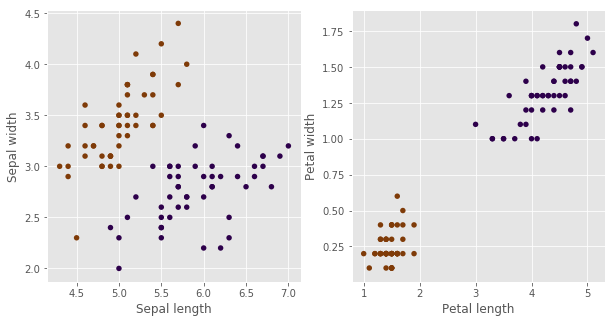

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [6]:
pred_iris = Clustering(eps=0.7, min_pts=5).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [7]:
from timeit import timeit
model= sc.DBSCAN(metric = 'euclidean')
t = timeit('model.fit_predict(x_iris)', "from __main__ import model, x_iris", number=1)
t

0.0026211465932233944

In [8]:
model = Clustering()
t = timeit('model.fit_predict(x_iris)', "from __main__ import model, x_iris", number=1)
t

0.0029352915032726384

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [9]:
## Задание 2
## Silhouette
def quality(X, y):
    """
    Implement quality criterion of your choice
    """
    clusters = np.unique(y)
    if clusters.shape[0] == 1:
        return 0
    silhouette = np.empty((X.shape[0], 1))
    all_dist = cdist(X, X) #distance between all pairs of elements
    cluster_dist = np.empty((X.shape[0], clusters.shape[0])) #average distance from elements to clusters 
    
    cluster_dist_list = []
    for i in clusters:
        mask = (y == i)
        cluster_dist_list.append(all_dist[:, mask].mean(axis=1).reshape(-1, 1))
    
    cluster_dist = np.concatenate(cluster_dist_list, axis=1)
    
    for i in clusters:
        mask = (y == i)
        a = cluster_dist[mask][:, clusters == i].reshape(-1, 1)
        b = cluster_dist[mask][:, clusters != i].min(axis=1).reshape(-1, 1)
        silhouette[mask] = (b - a) / np.concatenate([a, b], axis=1).max(axis=1).reshape(-1, 1)
        
    return silhouette.mean()

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

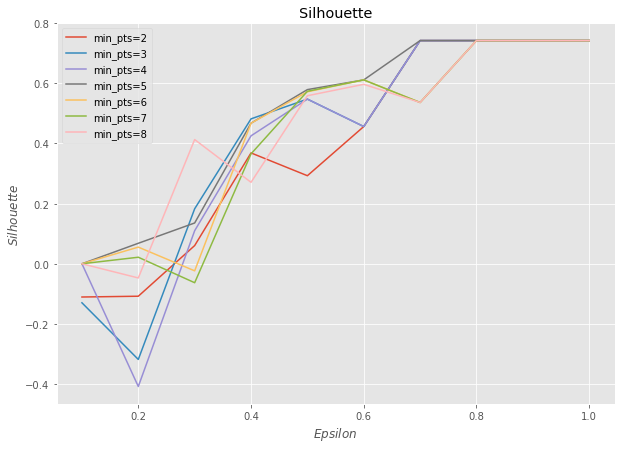

In [10]:
min_pts = np.arange(2, 9, 1)
eps = np.arange(0.1, 1.1,  0.1)
criteria = np.empty((min_pts.shape[0], eps.shape[0]))

for i, pts in enumerate(min_pts):
    for j, e in enumerate(eps):
        cls = Clustering(min_pts=pts, eps=e)
        y = cls.fit_predict(x_iris)
        criteria[i][j] = quality(x_iris, y)
        
pl.figure(figsize=(10, 7))
for i, pts in enumerate(min_pts):
    pl.plot(eps, criteria[i], label='min_pts=' + str(pts))
pl.legend()
pl.title("Silhouette")
pl.xlabel('$Epsilon$')
pl.ylabel('$Silhouette$')

In [11]:
## Задание 3

data_ = pd.read_csv('WDIDATA.csv')
data_.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [12]:
year = str(pd.isnull(data_).sum(axis=0)[4:].argmin()) #2010
new_data = data_[['Country Name', 'Indicator Code', year]]
new_data = new_data.pivot(index='Country Name', columns='Indicator Code', values=year)
new_data = new_data.fillna(new_data.mean())
new_data = new_data.dropna(axis=1, how='all')
new_data.to_csv('WDI_2010.scv')
new_data.head()

Indicator Code,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,AG.LND.EL5M.RU.K2,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,275.819331,4.254972,379100.0,58.067580,7793000.0,0.270561,11.936709,2.962000e+06,0.180743,48875.357378,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
Albania,306.894208,97.322684,12013.0,43.843066,626000.0,0.214897,22.846715,1.457000e+05,2.554745,1294.595459,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
Algeria,457.433490,19.481472,413740.0,17.371334,7502000.0,0.207710,3.149798,2.856586e+06,0.381654,378.759186,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
American Samoa,306.894208,190.633171,49.0,24.500000,3000.0,0.053921,15.000000,3.227095e+07,9.500000,4.429730,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
Andorra,306.894208,190.633171,201.0,42.765957,2500.0,0.029604,5.319149,3.227095e+07,3.968023,48875.357378,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352


Обработка таблицы

In [13]:
data = pd.read_csv('WDI_2010.scv')
data.head()


,Country Name,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,275.819331,4.254972,379100.0,58.067580,7793000.0,0.270561,11.936709,2.962000e+06,0.180743,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
1,Albania,306.894208,97.322684,12013.0,43.843066,626000.0,0.214897,22.846715,1.457000e+05,2.554745,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
2,Algeria,457.433490,19.481472,413740.0,17.371334,7502000.0,0.207710,3.149798,2.856586e+06,0.381654,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
3,American Samoa,306.894208,190.633171,49.0,24.500000,3000.0,0.053921,15.000000,3.227095e+07,9.500000,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352
4,Andorra,306.894208,190.633171,201.0,42.765957,2500.0,0.029604,5.319149,3.227095e+07,3.968023,...,30.65336,20.729016,33.35166,4.325573,20.700545,15.468545,18.7479,20.815995,23.334244,25.130352


In [14]:
X = data.iloc[:, 1:].values
index = X.std(axis=0) != 0
X[:, index] = (X[:, index] - X[:, index].mean(axis=0)) / X[:, index].std(axis=0)
X = X[:, index] 


In [15]:
pred_x = Clustering(min_pts=2, eps=25).fit_predict(X)
cluster_ = np.unique(pred_x)
cluster = []
for i in cluster_:
    cluster.append(data.iloc[:, 0][pred_x == i])


In [16]:
print cluster[0].head()
print cluster[0].shape

0            Afghanistan
1                Albania
2                Algeria
5                 Angola
6    Antigua and Barbuda
Name: Country Name, dtype: object
(161L,)


DBSCAN отнес эти страны к шуму. Видимо их показатели сильно выделяются на общем фоне

In [17]:
print cluster[1].head()
print cluster[1].shape

3     American Samoa
4            Andorra
7         Arab World
12           Austria
17          Barbados
Name: Country Name, dtype: object
(90L,)


Страны "среднего" типа. Такое количество вызвано заполнением nan средним значение по столбцу

In [18]:
print cluster[2].head()
print cluster[2].shape

61                            East Asia & Pacific
62     East Asia & Pacific (IDA & IBRD countries)
128                     Late-demographic dividend
Name: Country Name, dtype: object
(3L,)


Восточная Азия

In [19]:
print cluster[3].head()
print cluster[3].shape

71                Euro area
72    Europe & Central Asia
75           European Union
Name: Country Name, dtype: object
(3L,)


Европейский регион

In [20]:
print cluster[4].head()
print cluster[4].shape

98                   High income
181                 OECD members
194    Post-demographic dividend
Name: Country Name, dtype: object
(3L,)


Страны с хорошой экономикой

In [21]:
print cluster[5].head()
print cluster[5].shape

105                                      IDA only
228    Sub-Saharan Africa (excluding high income)
Name: Country Name, dtype: object
(2L,)


Страны со слабым развитием. Если поменять "eps" на 20 этот класс будет включать критерии плохо празвитых стран. 

In [22]:
print cluster[6].head()
print cluster[6].shape

217                 South Asia
218    South Asia (IDA & IBRD)
Name: Country Name, dtype: object
(2L,)


Северная Азия

In [23]:
X_embedded = sm.TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(264L, 2L)

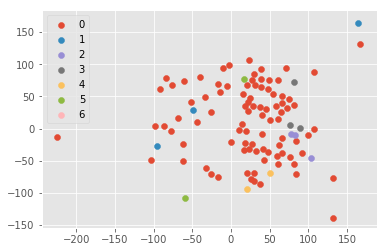

In [24]:
for i in xrange(cluster_.shape[0]):
    mask = pred_x == i
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=i)
plt.legend()

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.